# Computing turbulent lengthscales

The two point correlation $R_{ij}$ is defined as
$$ R_{ij}({\mathbf x},\boldsymbol{\xi}) = 
\frac{\langle {u'_i(\mathbf{x}, t) u'_j(\mathbf{x}+\boldsymbol{\xi},t)} \rangle}
{ \sqrt{\langle u'^2_i \rangle} \sqrt{\langle u'^2_j \rangle}} $$

The fluctuations
$$ u'_i(\mathbf{x},t) = u_i(\mathbf{x},t) - \langle u_i(\mathbf{x},t) \rangle $$

The lengthscale is calculated as
$$ L = \int_0^\infty R_{ij}(\xi)\: {\textrm d}\xi  $$

See https://spiral.imperial.ac.uk/bitstream/10044/1/41599/4/Airflow_v16a_Revised25_final_deposit.pdf as a reference

In [1]:
%%capture
# Important header information
naluhelperdir = './'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import correlate as corr
from matplotlib.lines import Line2D
%matplotlib inline

# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

In [2]:
# Define all cases here
allcases = [
    # Stable cases stable05_avgRij_30001_39981_500_iplane_0.dat
    ['stable05',   'stable05_avgRij_30001_39981_500_iplane_0.dat',    {'color':'b', 'ls':'--', 'lw':0.5}],
    #['stable05',   'stable05_avgRij_40001_44991_500_iplane_0.dat',    {'color':'b', 'ls':'--', 'lw':0.5}],
    
    # Neutral cases
    ['neutral05',  'neutral05_avgRij_30001_39991_1000_iplane_0.dat',  {'color':'g', 'ls':'--', 'lw':0.5}],
    ['neutral10',  'neutral10_avgRij_31001_39481_849_iplane_0.dat',   {'color':'g', 'ls':'-.', 'lw':1}],
    ['neutral15',  'neutral15_avgRij_30001_39991_1000_iplane_0.dat',   {'color':'g', 'ls':'-',  'lw':2}],
    
    ['unstable05', 'unstable05_avgRij_30001_34991_500_iplane_0.dat',  {'color':'r', 'ls':'--', 'lw':0.5}],
    ['unstable10', 'unstable10_avgRij_30001_34991_500_iplane_0.dat',  {'color':'r', 'ls':'-.', 'lw':1.0}],
    ['unstable15', 'unstable15_avgRij_30001_34991_500_iplane_0.dat',  {'color':'r', 'ls':'-',  'lw':2.0}],
]

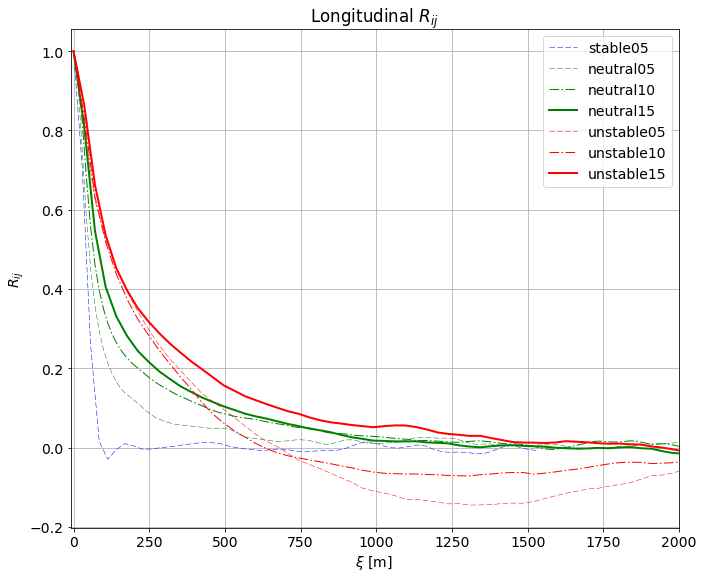

In [3]:
# Load and plot longitundinal Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for case in allcases:
    label    = case[0]
    filename = case[1]
    p        = case[2]
    dat=np.loadtxt(filename);
    plt.plot(dat[:,0], dat[:,1], label=label, 
             color=getparam('color',p,'k'), linewidth=getparam('lw', p, 1), linestyle=getparam('ls',p, '-'))

plt.xlim([-10,2000])
plt.xlabel('$\\xi$ [m] ')
plt.ylabel('$R_{ij}$ ')
plt.legend()
plt.grid()
plt.tight_layout()
plt.title('Longitudinal $R_{ij}$')

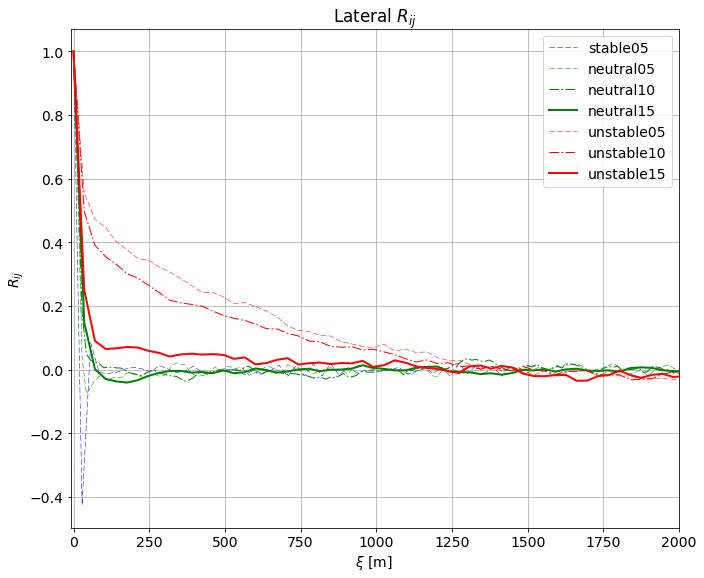

In [4]:
# Load and plot lateral Rij
plt.figure(figsize=(10,8))
plt.rc('font', size=14)

for case in allcases:
    label    = case[0]
    filename = case[1]
    p        = case[2]
    dat=np.loadtxt(filename);
    plt.plot(dat[:,2], dat[:,3], label=label, 
             color=getparam('color',p,'k'), linewidth=getparam('lw', p, 1), linestyle=getparam('ls',p, '-'))

plt.xlim([-10,2000])
plt.xlabel('$\\xi$ [m] ')
plt.ylabel('$R_{ij}$ ')
plt.legend()
plt.grid()
plt.tight_layout()
plt.title('Lateral $R_{ij}$')

## Calculate lengthscales

In [5]:
# Calculate lengthscale
for case in allcases:
    label    = case[0]
    filename = case[1]
    p        = case[2]
    dat       = np.loadtxt(filename);
    LONGscale = corr.calclengthscale(dat[:,0], dat[:,1])
    LATscale  = corr.calclengthscale(dat[:,2], dat[:,3])
    print("%-10s %10f %10f"%(label, LONGscale, LATscale))

stable05    41.775961   0.000000
neutral05  110.435741  15.245327
neutral10  165.398368  20.634052
neutral15  184.081967  22.961169
unstable05 187.868710 270.538753
unstable10 177.457502 215.027457
unstable15 263.475309  67.999898
